In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [32]:
df= pd.read_csv("/kaggle/input/crop-yield-data/Crop Yeild Data.csv")
df.sample(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Avg_Temperature,Max_Temperature,Min_Temperature
13280,Gram,2013,Rabi,Maharashtra,1519500.000,1400640,1409.800,219552555.000,410265.000,0.863,25.280,35.399,15.612
1518,Turmeric,2003,Whole Year,West Bengal,12619.000,24496,1526.700,1249028.620,3028.560,1.866,25.849,35.492,16.512
13239,Ginger,2013,Whole Year,Madhya Pradesh,10668.000,20629,1451.400,1541419.320,2880.360,1.579,25.477,36.615,14.649
19186,Sugarcane,2014,Whole Year,Arunachal Pradesh,1790.000,34900,2403.200,270218.400,590.700,20.191,20.922,30.342,13.200
19342,Ragi,2008,Autumn,Odisha,26091.000,17371,1539.000,3732056.640,2348.190,0.573,25.592,35.214,16.518


Since one of our tagert variable is **Yeild** we will remove the **Production** column as it will cause data leakage. Also we will discard **Max** and **Min Temperature** and keep only the **Avg. Temperature**.

In [33]:
df.drop(columns=["Production","Max_Temperature","Min_Temperature"], inplace= True)

# Data Cleaning and Feature Engineering

Let's check first what our data looks like first.

In [34]:
df.dtypes

Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
Avg_Temperature    float64
dtype: object

First correct the **Year** column to Date format.

In [35]:
df["Crop_Year"]= pd.to_datetime(df["Crop_Year"])
df.head()

,Crop,Crop_Year,Season,State,Area,Annual_Rainfall,Fertilizer,Pesticide,Yield,Avg_Temperature
0,Arecanut,1970-01-01 00:00:00.000001997,Whole Year,Assam,73814.000,2051.400,7024878.380,22882.340,0.796,23.692
1,Arhar/Tur,1970-01-01 00:00:00.000001997,Kharif,Assam,6637.000,2051.400,631643.290,2057.470,0.710,23.692
2,Castor seed,1970-01-01 00:00:00.000001997,Kharif,Assam,796.000,2051.400,75755.320,246.760,0.238,23.692
3,Coconut,1970-01-01 00:00:00.000001997,Whole Year,Assam,19656.000,2051.400,1870661.520,6093.360,5238.052,23.692
4,Cotton(lint),1970-01-01 00:00:00.000001997,Kharif,Assam,1739.000,2051.400,165500.630,539.090,0.421,23.692


Since we are focusing on only kitchen gardening we will remove all the industrial crops.

In [36]:
df["Crop"].unique()

array(['Arecanut', 'Arhar/Tur', 'Castor seed', 'Coconut ', 'Cotton(lint)',
       'Dry chillies', 'Gram', 'Jute', 'Linseed', 'Maize', 'Mesta',
       'Niger seed', 'Onion', 'Other  Rabi pulses', 'Potato',
       'Rapeseed &Mustard', 'Rice', 'Sesamum', 'Small millets',
       'Sugarcane', 'Sweet potato', 'Tapioca', 'Tobacco', 'Turmeric',
       'Wheat', 'Bajra', 'Black pepper', 'Cardamom', 'Coriander',
       'Garlic', 'Ginger', 'Groundnut', 'Horse-gram', 'Jowar', 'Ragi',
       'Cashewnut', 'Banana', 'Soyabean', 'Barley', 'Khesari', 'Masoor',
       'Moong(Green Gram)', 'Other Kharif pulses', 'Safflower',
       'Sannhamp', 'Sunflower', 'Urad', 'Peas & beans (Pulses)',
       'other oilseeds', 'Other Cereals', 'Cowpea(Lobia)',
       'Oilseeds total', 'Guar seed', 'Other Summer Pulses', 'Moth'],
      dtype=object)

In [37]:
kitchen_garden_crops = [
    'Onion', 'Potato', 'Sweet potato', 'Garlic', 'Tapioca', 
    'Dry chillies', 'Ginger', 'Turmeric', 'Coriander', 
    'Black pepper', 'Cardamom', 'Gram', 'Moong(Green Gram)', 
    'Urad', 'Cowpea(Lobia)', 'Masoor', 'Peas & beans (Pulses)', 
    'Arhar/Tur', 'Banana', 'Coconut ', 'Cashewnut', 'Groundnut'
]

df = df[df['Crop'].isin(kitchen_garden_crops)].copy()

df.reset_index(drop=True, inplace=True)
df['Crop'].unique()

array(['Arhar/Tur', 'Coconut ', 'Dry chillies', 'Gram', 'Onion', 'Potato',
       'Sweet potato', 'Tapioca', 'Turmeric', 'Black pepper', 'Cardamom',
       'Coriander', 'Garlic', 'Ginger', 'Groundnut', 'Cashewnut',
       'Banana', 'Masoor', 'Moong(Green Gram)', 'Urad',
       'Peas & beans (Pulses)', 'Cowpea(Lobia)'], dtype=object)

Now let's check if there are any duplicate values or null are present in the dataset or not. Also we will check if the data consists outliers or not.

In [38]:
print("Null values in the data", df.isnull().sum(), sep= "\n")
print("\nDuplicate values in the data:", df.duplicated().sum(), sep="\n")

Null values in the data
Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
Avg_Temperature    0
dtype: int64

Duplicate values in the data:
0


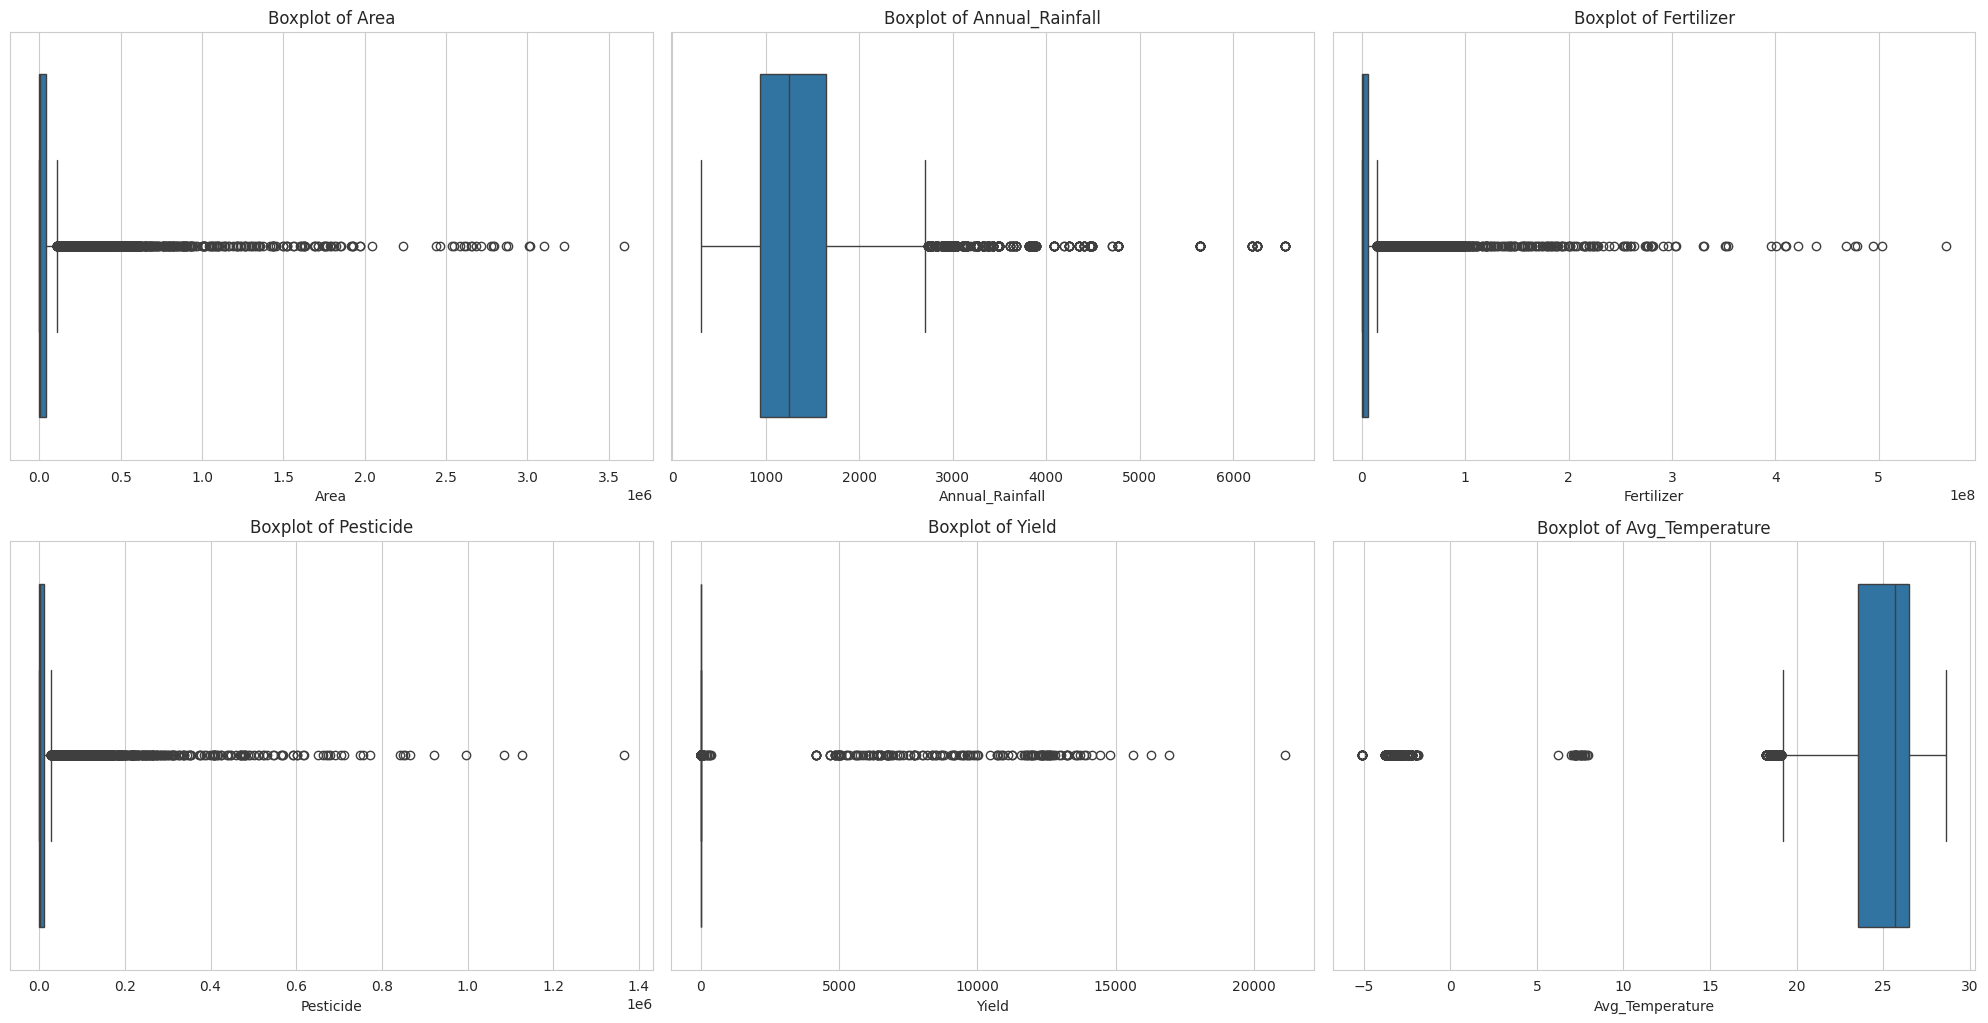

In [39]:
numerical_cols= df.select_dtypes(include= ['number']).columns.tolist()
fig, axes = plt.subplots(3, 3, figsize=(20, 15)) 
axes = axes.flatten() 
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, ax=axes[i], orient= 'h')
    axes[i].set_title(f'Boxplot of {col}')
    plt.xticks(rotation= 45)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

We can see there are many extreme outliers, but they aren't wrong. For example if someone has a large area he/she will have to use fertilizers and pesticites more. So the extreme outliers aren't wrong. So, instead of removing them let's convert them in some meaningful features.

In [40]:
df["Area"]= df["Area"]* 107639.104

In [41]:
df["Fertilizer_per_sq_foot"]= df["Fertilizer"] / df["Area"]  # kg/hectar
df["Pesticide_per_sq_foot"]= df["Pesticide"] / df["Area"]

df.drop(columns=["Fertilizer", "Pesticide"], inplace= True)
df.head()

,Crop,Crop_Year,Season,State,Area,Annual_Rainfall,Yield,Avg_Temperature,Fertilizer_per_sq_foot,Pesticide_per_sq_foot
0,Arhar/Tur,1970-01-01 00:00:00.000001997,Kharif,Assam,714400733.248,2051.400,0.710,23.692,0.001,0.000
1,Coconut,1970-01-01 00:00:00.000001997,Whole Year,Assam,2115754228.224,2051.400,5238.052,23.692,0.001,0.000
2,Dry chillies,1970-01-01 00:00:00.000001997,Whole Year,Assam,1462492506.048,2051.400,0.644,23.692,0.001,0.000
3,Gram,1970-01-01 00:00:00.000001997,Rabi,Assam,320656890.816,2051.400,0.465,23.692,0.001,0.000
4,Onion,1970-01-01 00:00:00.000001997,Whole Year,Assam,843029462.528,2051.400,2.343,23.692,0.001,0.000


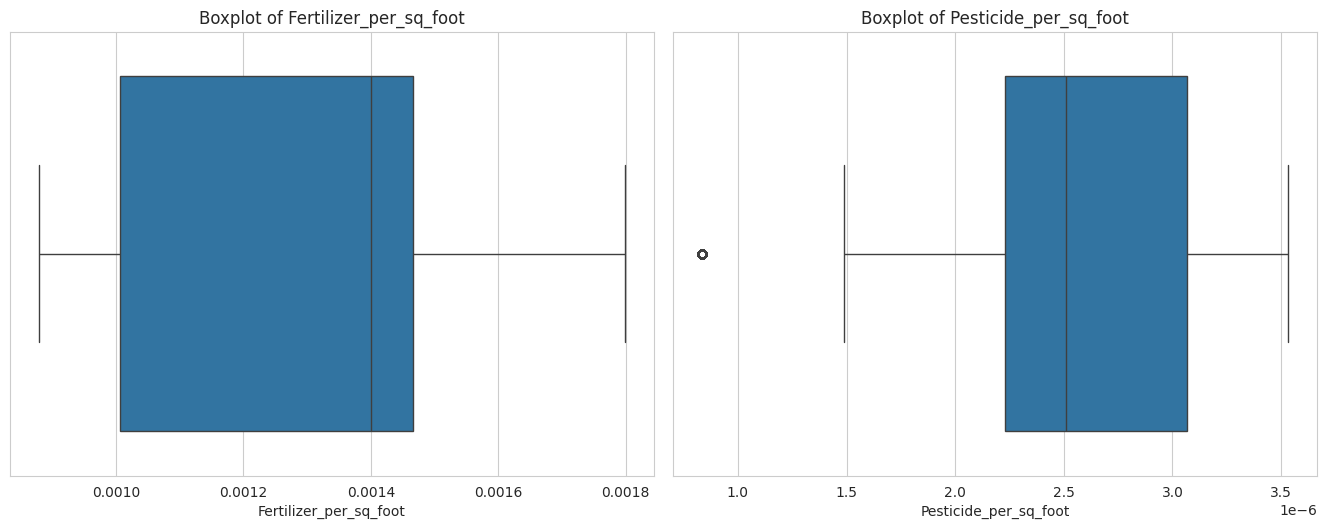

In [42]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15)) 
axes = axes.flatten() 
for i, col in enumerate(["Fertilizer_per_sq_foot", "Pesticide_per_sq_foot"]):
    sns.boxplot(data=df, x=col, ax=axes[i], orient= 'h')
    axes[i].set_title(f'Boxplot of {col}')
    plt.xticks(rotation= 45)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

# Exploratory Data Analysis

After the initial cleaning and feature engineering phase let's dive into EDA. We are going to start with the correlation between the features.

In [43]:
numerical_cols_featured= df.select_dtypes(include= ['number']).columns.tolist()

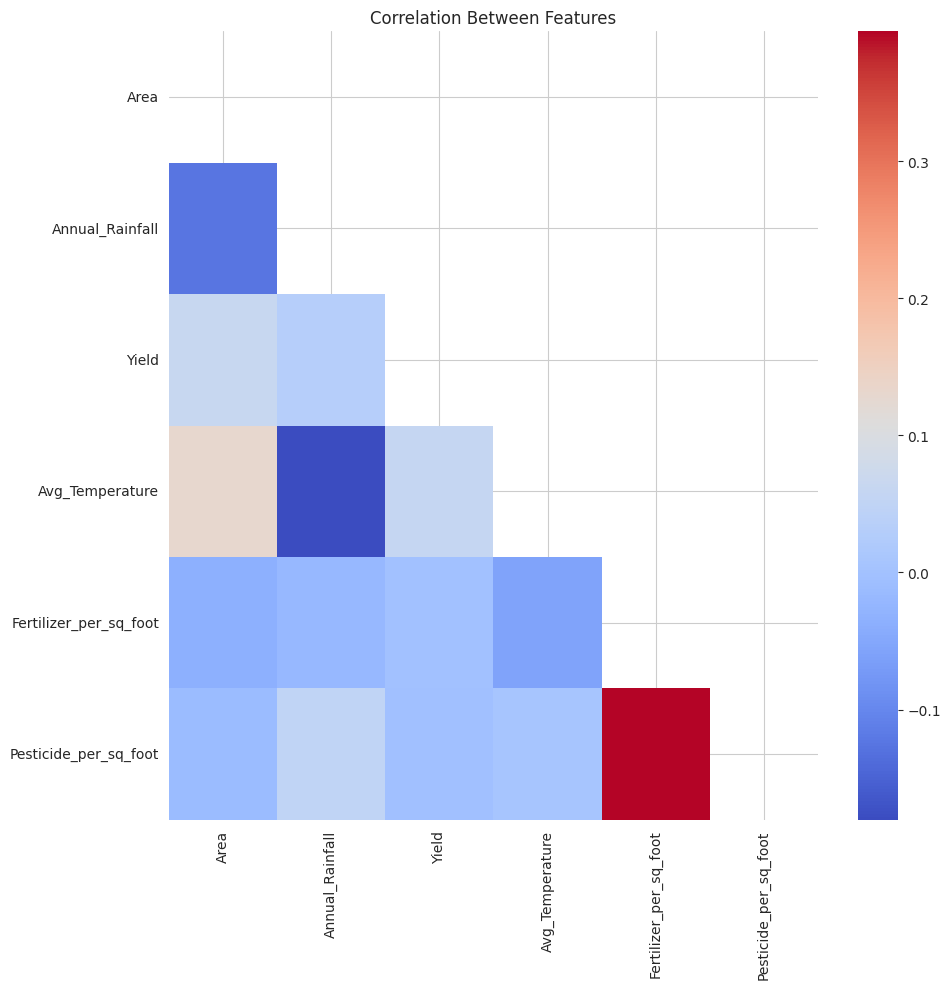

In [44]:
corr_mat= df[numerical_cols_featured].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
sns.heatmap(corr_mat, mask = mask, cmap= "coolwarm")
plt.title("Correlation Between Features")
plt.tight_layout()
plt.show()

We can see that except few features all others aren't too much correlated. It is good since the model will not suffer from bias for this. 

Now look at the distribution of all the columns.

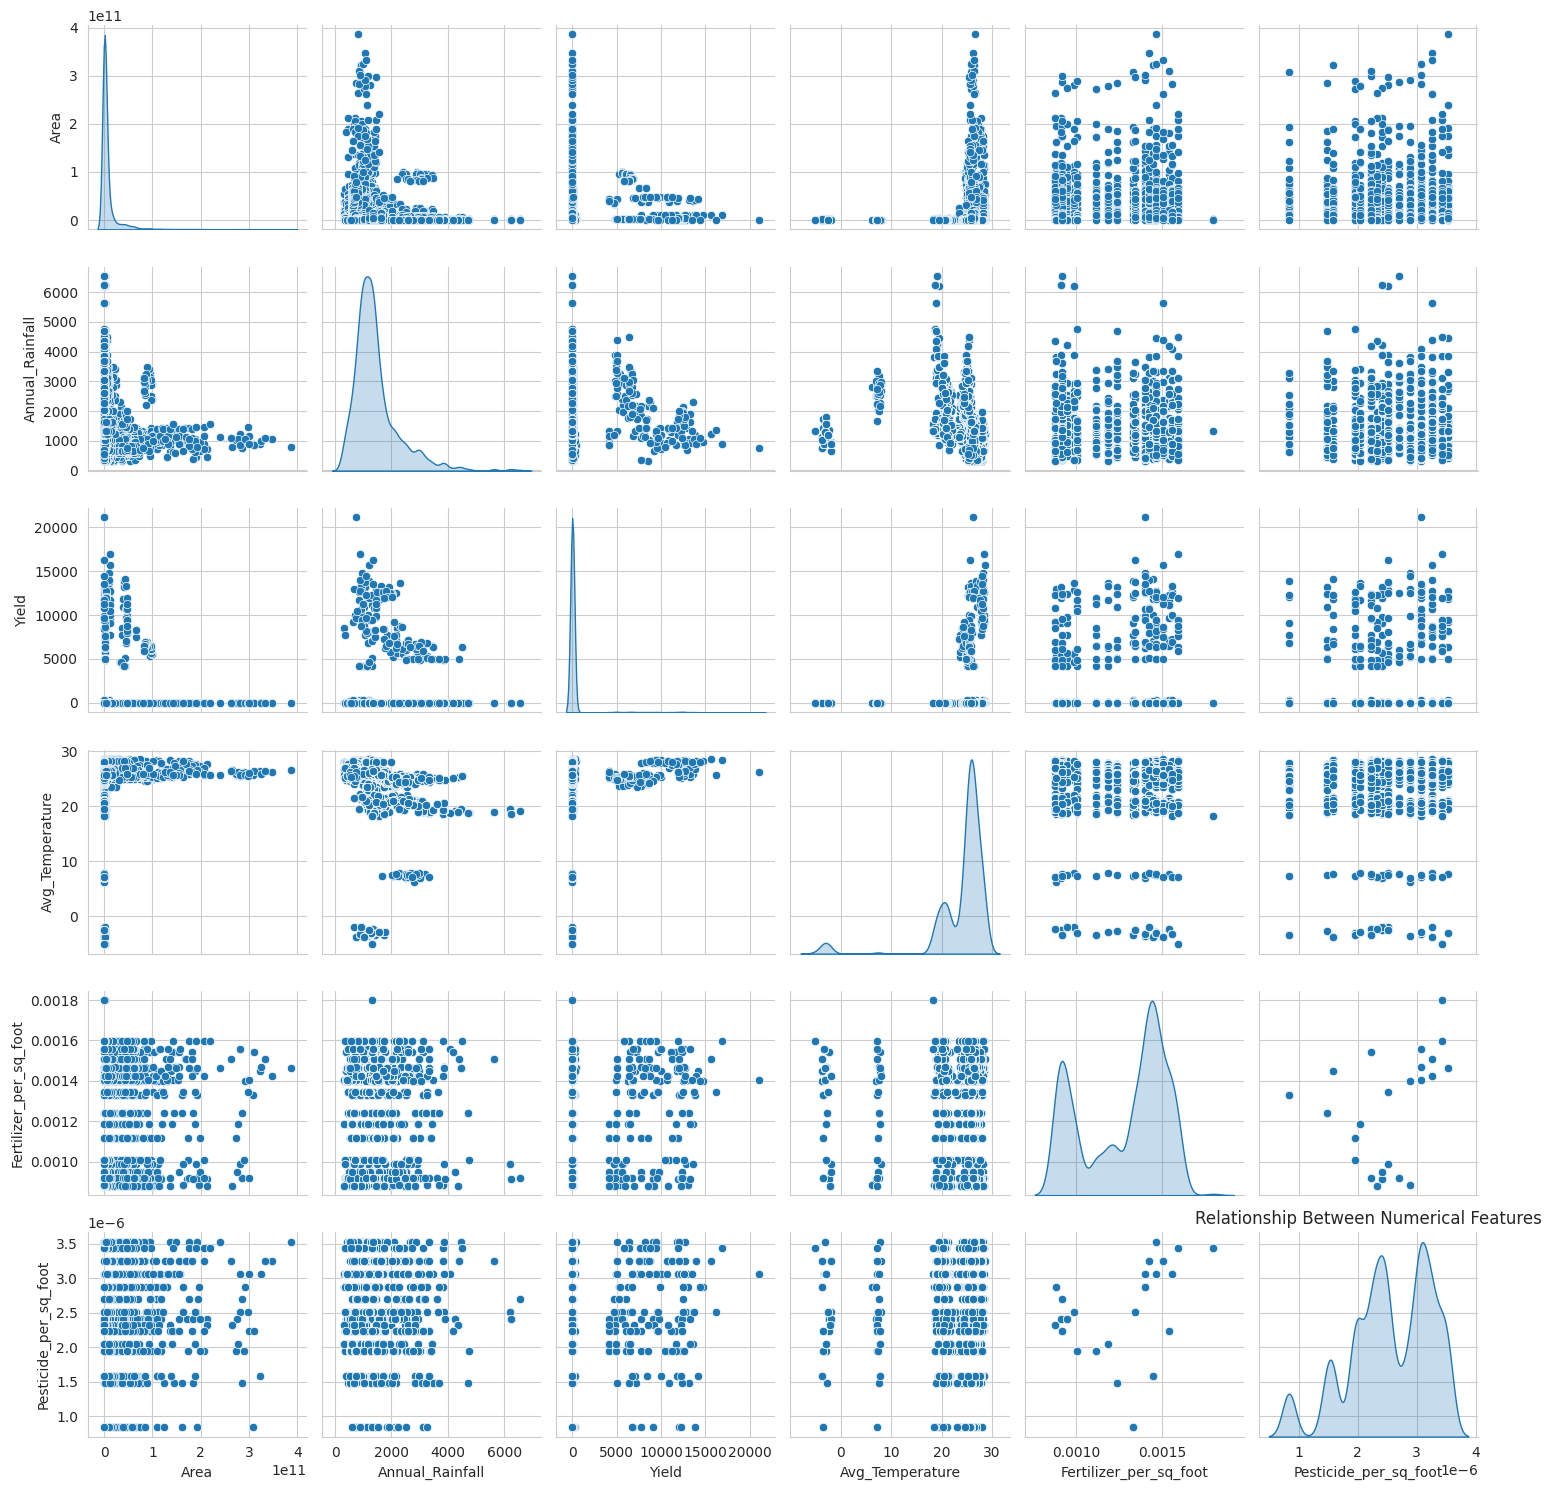

In [45]:
sns.pairplot(df[numerical_cols_featured], diag_kind='kde')
plt.title("Relationship Between Numerical Features")
plt.tight_layout()
plt.show()

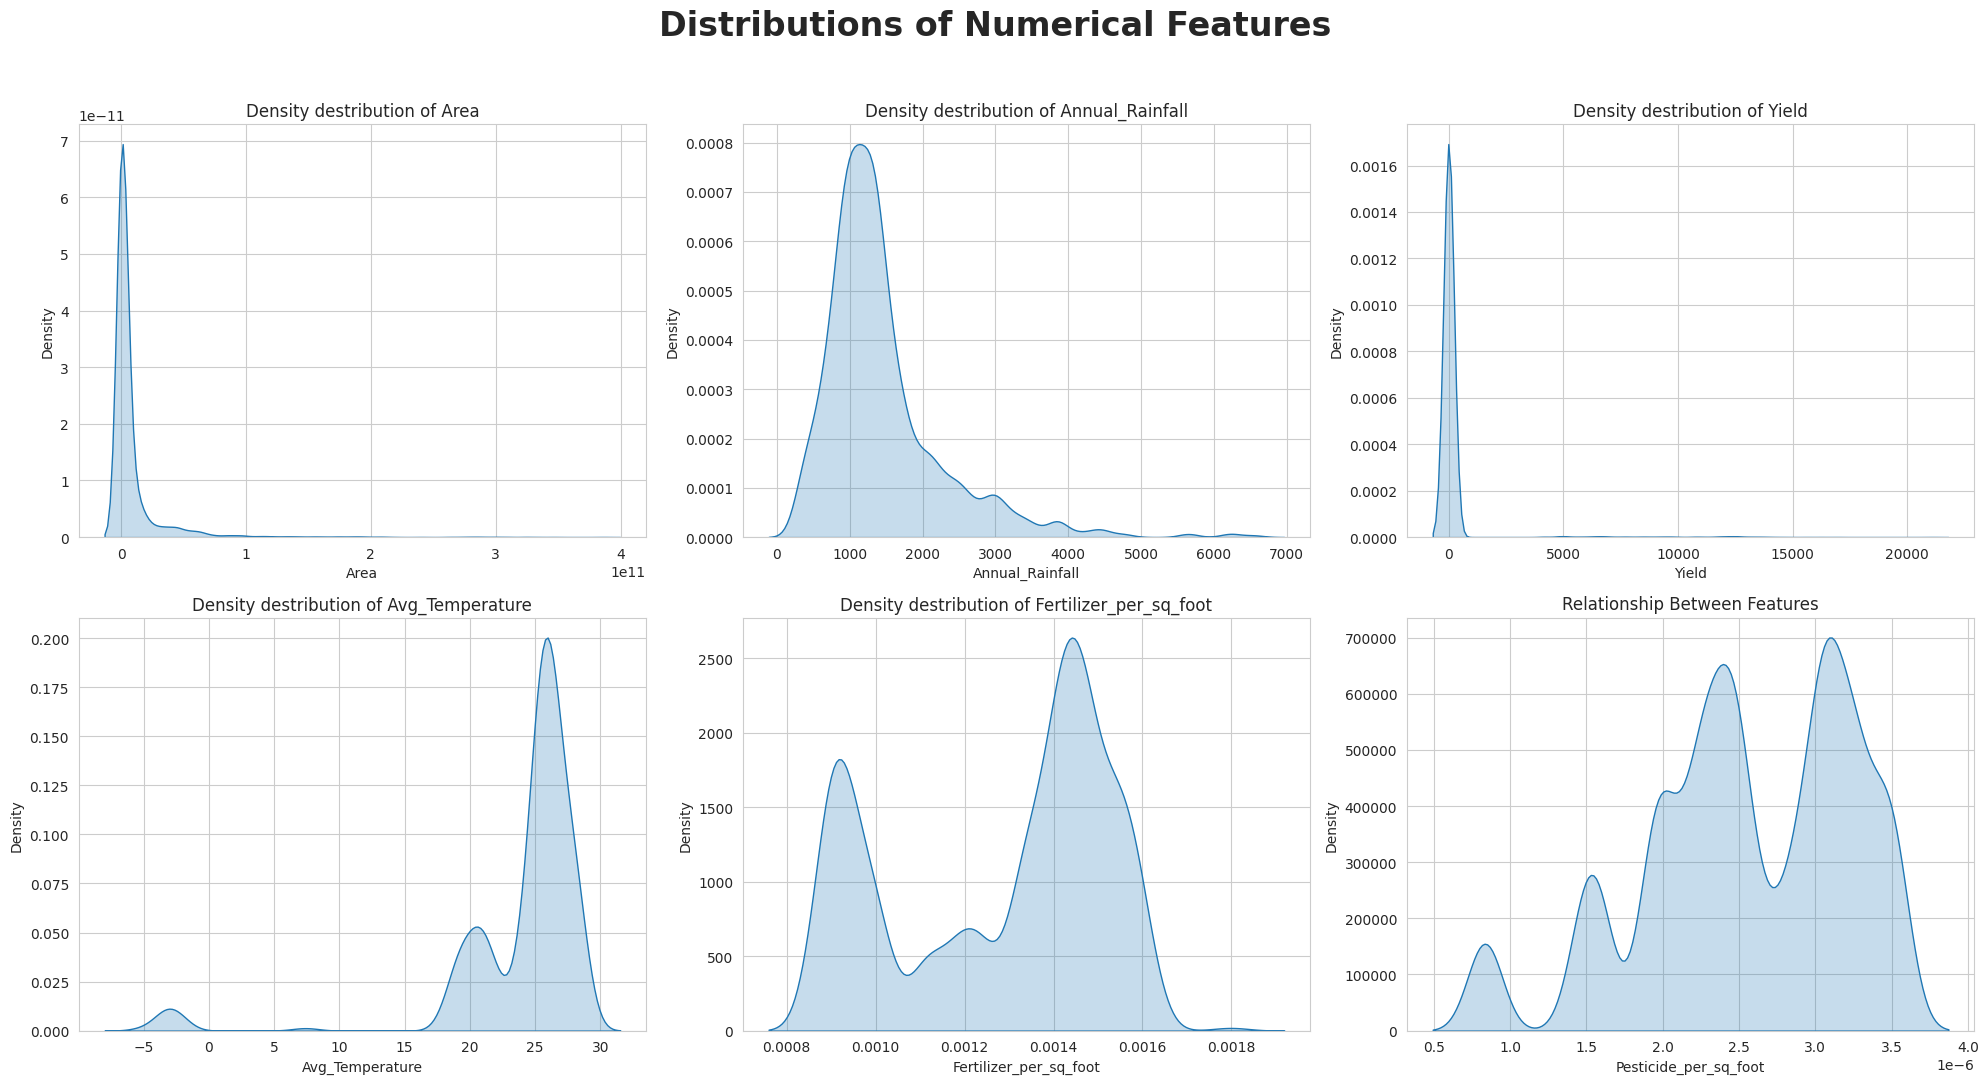

In [46]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15)) 
axes = axes.flatten() 
for i, col in enumerate(numerical_cols_featured):
    sns.kdeplot(data=df, x=col, ax=axes[i], fill= True)
    axes[i].set_title(f'Density destribution of {col}')
    
fig.suptitle("Distributions of Numerical Features", fontsize=24, fontweight='bold', y=1.02)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.title("Relationship Between Features")
plt.tight_layout()
plt.show()

We can see that all the columns have different scales and distributions. We will handle that in our secondary data preprocessing pipeline by normalizing or standardizing.

Let's check if our targated categorical column is imbalanced or not.

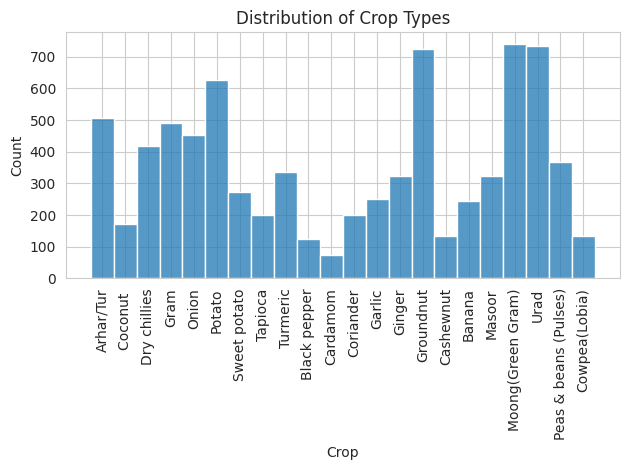

In [47]:
sns.histplot(data= df["Crop"], fill= True)
plt.title("Distribution of Crop Types")
plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()

We will be having issues with the year cloumn since it is a time series. Technically for this project we don't need this since we have the season column. So we will remove it for error handling.

In [48]:
df.drop(columns="Crop_Year", inplace= True)
df.head()

,Crop,Season,State,Area,Annual_Rainfall,Yield,Avg_Temperature,Fertilizer_per_sq_foot,Pesticide_per_sq_foot
0,Arhar/Tur,Kharif,Assam,714400733.248,2051.400,0.710,23.692,0.001,0.000
1,Coconut,Whole Year,Assam,2115754228.224,2051.400,5238.052,23.692,0.001,0.000
2,Dry chillies,Whole Year,Assam,1462492506.048,2051.400,0.644,23.692,0.001,0.000
3,Gram,Rabi,Assam,320656890.816,2051.400,0.465,23.692,0.001,0.000
4,Onion,Whole Year,Assam,843029462.528,2051.400,2.343,23.692,0.001,0.000


**Summary :**

+ We have to perform encoding to categorical features.
+ We need to balance the data.
+ Also we need to normalise the data and we need to define a pipeline that can handle incoming new data to standardize and other preprocessing if required.

# Model Fitting and Evaluation

## Secondary Preprocessing

Since as a kitchen gardener amount of fertilizer and pestiside is aslo is a subject of research and recomendation we will break the dataframe into parts and fit different models to make the recomendation system more realistic.

In [49]:
name_df= df.drop(columns=["Fertilizer_per_sq_foot", "Pesticide_per_sq_foot", "Yield"])

We will take the dataframes one by one and fit the models.

In [50]:
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, root_mean_squared_error, r2_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
import optuna
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, XGBRegressor
from optuna.visualization import plot_terminator_improvement
from optuna.terminator import report_cross_validation_scores
from sklearn.linear_model import LogisticRegression
import time
from plotly.io import show
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [51]:
name_df.head()

,Crop,Season,State,Area,Annual_Rainfall,Avg_Temperature
0,Arhar/Tur,Kharif,Assam,714400733.248,2051.400,23.692
1,Coconut,Whole Year,Assam,2115754228.224,2051.400,23.692
2,Dry chillies,Whole Year,Assam,1462492506.048,2051.400,23.692
3,Gram,Rabi,Assam,320656890.816,2051.400,23.692
4,Onion,Whole Year,Assam,843029462.528,2051.400,23.692


In [52]:
def preprocessing_pipeline(df, target):
    X = df.drop(columns=target)
    Y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    numerical_cols = X.select_dtypes(include='number').columns.tolist()
    categorical_cols = X.select_dtypes(include='object').columns.tolist()

    
    if df[target].dtype == 'object':
        percentages= (Y.value_counts() / len(Y)) * 100
        imbalance_percentage = percentages.iloc[0] - percentages
        if (imbalance_percentage < 5).any():
            smote_nc = SMOTENC(categorical_features= categorical_cols, sampling_strategy='auto', random_state=42)
            X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)
    
    preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),          
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols) 
    ],
    remainder='passthrough'
    )
    
    X_train_processed = preprocessor.fit_transform(X_train_resampled)
    X_test_processed = preprocessor.transform(X_test)
    
    return X_train_processed, X_test_processed, y_train_resampled, y_test


In [53]:
X_train, X_test, y_train, y_test = preprocessing_pipeline(name_df, "Crop")
print(X_train.shape, X_test.shape)

(13134, 39) (1572, 39)


Since target variable for this data is categorical and imbalanced we need to balance it first.

In [54]:
print(y_train.value_counts())

Crop
Dry chillies             597
Potato                   597
Groundnut                597
Onion                    597
Banana                   597
Coriander                597
Cardamom                 597
Peas & beans (Pulses)    597
Urad                     597
Cashewnut                597
Ginger                   597
Gram                     597
Sweet potato             597
Moong(Green Gram)        597
Black pepper             597
Tapioca                  597
Turmeric                 597
Masoor                   597
Garlic                   597
Arhar/Tur                597
Cowpea(Lobia)            597
Coconut                  597
Name: count, dtype: int64


## Model fitting and evaluation

In [55]:
def objective_function(trial):
    classifier_name = trial.suggest_categorical("classifier", ["SVM", "Naive_Bayes", "XGBoost", "RandomForest"])
    trial.set_user_attr("model_type", classifier_name)
    
    if classifier_name == "SVM":
        C = trial.suggest_float('svc_C', 0.1, 100, log=True)                 
        kernel = trial.suggest_categorical('svc_kernel', ['rbf', 'poly', 'sigmoid'])
        gamma = trial.suggest_categorical('svc_gamma', ['scale', 'auto'])
        degree = trial.suggest_int('svc_degree', 1, 5) if kernel == 'poly' else 3
        model = SVC(C=C, kernel=kernel, gamma=gamma, degree=degree, random_state=42)
        target_y = y_train
        
    elif classifier_name == "Naive_Bayes":
        var_smoothing = trial.suggest_float('nb_var_smoothing', 1e-9, 1e-1, log=True)
        model = GaussianNB(var_smoothing=var_smoothing)
        target_y = y_train
        
    elif classifier_name == "RandomForest":
        n_estimators = trial.suggest_int('rf_n_estimators', 50, 250)
        max_depth = trial.suggest_int('rf_max_depth', 10, 30)   
        max_features = trial.suggest_categorical('rf_max_features', ["sqrt", "log2"])
        min_impurity_decrease = trial.suggest_float('rf_min_impurity', 1e-7, 1e-2, log=True)
        model = RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth,
            max_features=max_features, min_impurity_decrease=min_impurity_decrease,
            random_state=42
        )
        target_y = y_train
        
    else: 
        le = LabelEncoder()
        target_y = le.fit_transform(y_train)
        
        n_estimators = trial.suggest_int('xgb_n_estimators', 50, 250)
        max_depth = trial.suggest_int('xgb_max_depth', 3, 15) 
        learning_rate = trial.suggest_float('xgb_learning_rate', 0.001, 0.5, log=True)
        xgb_gamma = trial.suggest_float('xgb_gamma', 1e-4, 1.0, log=True)
        
        model = XGBClassifier(
            n_estimators=n_estimators, max_depth=max_depth, 
            learning_rate=learning_rate, gamma=xgb_gamma,
            random_state=42, verbosity=0 
        )

    score = cross_val_score(model, X_train, target_y, cv=3, scoring='accuracy', n_jobs=-1)
    report_cross_validation_scores(trial, score)        
    return score.mean()
        


In [56]:
def model_comparison(X_train, X_test, y_train, y_test, study, model_map):
    acc_scores = []
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)

    def get_clean_params(params, prefix):
        cleaned = {}
        for k, v in params.items():
            if k.startswith(prefix):
                clean_key = k.replace(prefix, "")
                if isinstance(v, float) and v.is_integer():
                    v = int(v)
                cleaned[clean_key] = v
        return cleaned

    # 1. Best Model
    best_trial = study.best_trial
    best_model_type = best_trial.params.get("classifier")
    best_config = model_map[best_model_type]
    clean_best_params = get_clean_params(best_trial.params, best_config['prefix'])
    
    best_model = best_config["class"](**clean_best_params) # random_state removal if needed
    best_model.fit(X_train, y_train_encoded)
    acc_scores.append(accuracy_score(y_test_encoded, best_model.predict(X_test)))

    # 2. Error Crossing Model
    error_threshold = 0.05
    crossed_trial_idx = study.best_trial.number 
    
    for i, t in enumerate(study.trials):
        if t.value is not None and t.value < error_threshold:
            crossed_trial_idx = i
            break
            
    ECT = study.trials[crossed_trial_idx]
    ect_model_type = ECT.params.get("classifier")
    ect_config = model_map[ect_model_type]
    clean_ect_params = get_clean_params(ECT.params, ect_config['prefix'])

    error_crossed_model = ect_config["class"](**clean_ect_params)
    error_crossed_model.fit(X_train, y_train_encoded)
    acc_scores.append(accuracy_score(y_test_encoded, error_crossed_model.predict(X_test)))

    # 3. Stack Model
    def build_stacking_model(study, model_map, n_top=3):
        df = study.trials_dataframe(attrs=('number', 'value', 'params', 'user_attrs'))
        top_trials = df.dropna(subset=['value']).sort_values(by="value", ascending=False).head(n_top)
        
        estimators = []
        for i, row in top_trials.iterrows():
            model_type = row["user_attrs_model_type"]
            config = model_map[model_type]
            
            model_params = {}
            prefix = f"params_{config['prefix']}"
            
            for col, val in row.items():
                if col.startswith(prefix) and pd.notna(val):
                    clean_key = col.replace(prefix, "")
                    
                    if isinstance(val, float) and val.is_integer():
                        val = int(val)
                        
                    model_params[clean_key] = val
            
            instance = config["class"](**model_params)
            estimators.append((f"{model_type}_{i}", instance))
        
        return StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

    stack_model = build_stacking_model(study, model_map)
    stack_model.fit(X_train, y_train_encoded)
    acc_scores.append(accuracy_score(y_test_encoded, stack_model.predict(X_test)))

    # Output Results
    scores_df = pd.DataFrame({
        "Model": ["Best model", "Error crossing model", "Stack model"],
        "Accuracy Score": acc_scores
    })
    display(scores_df)
    return best_model, error_crossed_model, stack_model


In [57]:
study = optuna.create_study(direction='maximize', study_name= "hyperparameter_tuning", sampler = optuna.samplers.TPESampler(seed=42))
study.optimize(objective_function, n_trials=50,  timeout=2400, n_jobs= -1)

[I 2026-02-07 06:29:59,091] A new study created in memory with name: hyperparameter_tuning
[I 2026-02-07 06:30:13,007] Trial 1 finished with value: 0.4199025430181209 and parameters: {'classifier': 'SVM', 'svc_C': 5.89997379216177, 'svc_kernel': 'rbf', 'svc_gamma': 'scale'}. Best is trial 1 with value: 0.4199025430181209.
[I 2026-02-07 06:30:13,317] Trial 2 finished with value: 0.19156388000609106 and parameters: {'classifier': 'Naive_Bayes', 'nb_var_smoothing': 9.082769526409107e-06}. Best is trial 1 with value: 0.4199025430181209.
[I 2026-02-07 06:30:23,133] Trial 0 finished with value: 0.42454697731079644 and parameters: {'classifier': 'SVM', 'svc_C': 13.418598273499596, 'svc_kernel': 'poly', 'svc_gamma': 'scale', 'svc_degree': 2}. Best is trial 0 with value: 0.42454697731079644.
[I 2026-02-07 06:30:23,322] Trial 4 finished with value: 0.16978833561748133 and parameters: {'classifier': 'Naive_Bayes', 'nb_var_smoothing': 3.02573793432733e-09}. Best is trial 0 with value: 0.4245469773

In [58]:
fg = plot_terminator_improvement(study, plot_error=True)
show(fg)

/tmp/ipykernel_55/1539117911.py:1: ExperimentalWarning:

optuna.visualization._terminator_improvement.plot_terminator_improvement is experimental (supported from v3.2.0). The interface can change in the future.

/usr/local/lib/python3.12/dist-packages/optuna/visualization/_terminator_improvement.py:93: ExperimentalWarning:

RegretBoundEvaluator is experimental (supported from v3.2.0). The interface can change in the future.

/usr/local/lib/python3.12/dist-packages/optuna/visualization/_terminator_improvement.py:98: ExperimentalWarning:

CrossValidationErrorEvaluator is experimental (supported from v3.2.0). The interface can change in the future.

100%|██████████| 50/50 [00:08<00:00,  6.10it/s]


From the above graph we can see that no further improvement is required. Hence, we will fit the XGBoost model with best parameter values.

In [59]:
model_map = {
    "XGBoost": {"class":XGBClassifier, "prefix": "xgb_"},
    "RandomForest": {"class":RandomForestClassifier, "prefix": "rf_"},
    "SVM": {"class":SVC, "prefix": "svc_"},
    "Naive_Bayes": {"class": GaussianNB, "prefix": "nb_"}
}
model_comparison(X_train, X_test, y_train, y_test, study,model_map)

,Model,Accuracy Score
0,Best model,0.566
1,Error crossing model,0.566
2,Stack model,0.562


(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=0.0005561235992914264,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.13189783163020133,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=10, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=91, n_jobs=None,
               num_parallel_tree=None, ...),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_sto

In [60]:
"""y_train_encoded= le.fit_transform(y_train)
y_test_encoded= le.transform(y_test)"""

'y_train_encoded= le.fit_transform(y_train)\ny_test_encoded= le.transform(y_test)'

Let's see if inserting soild nutrient data in the model improves it's performance ot not

In [61]:
soil_nutrient= pd.read_csv("/kaggle/input/soil-nutrient-data/FAO_Crop_data.csv")
soil_nutrient.sample(5)

,year,state,district,rainfall_mm,temperature_C,humidity_pct,soil_N_kg_ha,soil_P_kg_ha,soil_K_kg_ha,soil_pH,crop,yield_kg_ha
4940,2021,Andhra Pradesh,Andhra_D81,1254.400,20.960,81.700,99.100,0.000,12.800,6.690,Sugarcane,81981.500
13645,2023,Tamil Nadu,Tamil_D91,636.200,31.760,56.300,56.700,31.700,60.200,NaN,Jute,3103.800
7874,2023,Gujarat,Gujarat_D137,1062.700,25.990,NaN,91.100,17.200,0.000,8.070,Groundnut,2854.400
7619,2020,Madhya Pradesh,Madhya_D47,1189.300,24.920,75.900,25.900,46.800,8.800,5.160,Groundnut,3379.100
14412,2022,Punjab,Punjab_D13,1091.400,31.960,99.000,53.800,19.700,0.000,5.770,Sugarcane,81872.000


We have to change the N,P,K units from kg/hectar to kg/Sq. foot

In [62]:
soil_nutrient["soil_N_kg_sq_foot"]= soil_nutrient["soil_N_kg_ha"] / 107639.1
soil_nutrient["soil_P_kg_sq_foot"]= soil_nutrient["soil_P_kg_ha"] / 107639.1
soil_nutrient["soil_K_kg_sq_foot"]= soil_nutrient["soil_K_kg_ha"] / 107639.1

In [63]:
df['State'] = df['State'].str.strip().str.title()
soil_nutrient['State'] = soil_nutrient['state'].str.strip().str.title()

soil_nutrient = soil_nutrient.drop_duplicates(subset=['State'])

cols_to_keep = ['State', 'humidity_pct', 'soil_N_kg_sq_foot', 'soil_P_kg_sq_foot', 'soil_K_kg_sq_foot','soil_pH']
merged_df = df.merge(soil_nutrient[cols_to_keep], on='State', how='left')

if merged_df.isnull().values.any():
    print("Warning: Missing values detected! Handle them (e.g., fillna) before training.")

Let's check if there are any missing values or not.

In [64]:
print(merged_df.isna().sum())

Crop                         0
Season                       0
State                        0
Area                         0
Annual_Rainfall              0
Yield                        0
Avg_Temperature              0
Fertilizer_per_sq_foot       0
Pesticide_per_sq_foot        0
humidity_pct              3643
soil_N_kg_sq_foot         2985
soil_P_kg_sq_foot         3069
soil_K_kg_sq_foot         3416
soil_pH                   2704
dtype: int64


We have to impute the missing values. I am considering iterative imputer for this task.

In [65]:
nutrient_cols = ['humidity_pct', 'soil_N_kg_sq_foot', 'soil_P_kg_sq_foot', 'soil_K_kg_sq_foot','soil_pH'] 

imputer = IterativeImputer(random_state=42, max_iter=10)
merged_df.loc[:, nutrient_cols] = imputer.fit_transform(merged_df[nutrient_cols])

print(merged_df.isna().sum())

Crop                      0
Season                    0
State                     0
Area                      0
Annual_Rainfall           0
Yield                     0
Avg_Temperature           0
Fertilizer_per_sq_foot    0
Pesticide_per_sq_foot     0
humidity_pct              0
soil_N_kg_sq_foot         0
soil_P_kg_sq_foot         0
soil_K_kg_sq_foot         0
soil_pH                   0
dtype: int64


In [66]:
crop= merged_df.drop(columns=["Fertilizer_per_sq_foot", "Pesticide_per_sq_foot", "Yield"])
X_train, X_test, y_train, y_test = preprocessing_pipeline(crop, "Crop")
print(X_train.shape, X_test.shape)

(13134, 44) (1572, 44)


In [67]:
study1 = optuna.create_study(direction='maximize', study_name= "hyperparameter_tuning", sampler = optuna.samplers.TPESampler(seed=1))
study1.optimize(objective_function, n_trials=50,  timeout=2400, n_jobs= -1)

[I 2026-02-07 06:36:12,244] A new study created in memory with name: hyperparameter_tuning
[I 2026-02-07 06:36:15,640] Trial 1 finished with value: 0.3453631795340338 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 247, 'rf_max_depth': 21, 'rf_max_features': 'sqrt', 'rf_min_impurity': 0.0019052385079800721}. Best is trial 1 with value: 0.3453631795340338.
[I 2026-02-07 06:36:19,063] Trial 2 finished with value: 0.6756509821836455 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 121, 'rf_max_depth': 24, 'rf_max_features': 'sqrt', 'rf_min_impurity': 4.4434625608982356e-07}. Best is trial 2 with value: 0.6756509821836455.
[I 2026-02-07 06:36:20,791] Trial 0 finished with value: 0.6754225673823665 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 77, 'rf_max_depth': 30, 'rf_max_features': 'sqrt', 'rf_min_impurity': 2.4676412320930586e-07}. Best is trial 2 with value: 0.6756509821836455.
[I 2026-02-07 06:36:51,973] Trial 3 finished with val

In [68]:
fg1 = plot_terminator_improvement(study1, plot_error=True)
show(fg1)

/tmp/ipykernel_55/3339072921.py:1: ExperimentalWarning:

optuna.visualization._terminator_improvement.plot_terminator_improvement is experimental (supported from v3.2.0). The interface can change in the future.

/usr/local/lib/python3.12/dist-packages/optuna/visualization/_terminator_improvement.py:93: ExperimentalWarning:

RegretBoundEvaluator is experimental (supported from v3.2.0). The interface can change in the future.

/usr/local/lib/python3.12/dist-packages/optuna/visualization/_terminator_improvement.py:98: ExperimentalWarning:

CrossValidationErrorEvaluator is experimental (supported from v3.2.0). The interface can change in the future.

100%|██████████| 50/50 [00:03<00:00, 16.47it/s]


In [69]:
model_map = {
    "XGBoost": {"class":XGBClassifier, "prefix": "xgb_"},
    "RandomForest": {"class":RandomForestClassifier, "prefix": "rf_"},
    "SVM": {"class":SVC, "prefix": "svc_"},
    "Naive_Bayes": {"class": GaussianNB, "prefix": "nb_"}
}
results = list(model_comparison(X_train, X_test, y_train, y_test, study1, model_map))

,Model,Accuracy Score
0,Best model,0.569
1,Error crossing model,0.569
2,Stack model,0.571


The stacking classifier is giving the best accuracy. But It not significantly distant from the best model. So, we are choosing the best model as the final model.

In [70]:
best_model= results[0]

In [71]:
# !rm /kaggle/working/crop_recomender.joblib

In [72]:
import joblib
filename = '/kaggle/working/crop_recomender.joblib'
joblib.dump(best_model, filename)

['/kaggle/working/crop_recomender.joblib']

Let us also save the encoder as well for the app.

In [73]:
crop.dtypes

Crop                  object
Season                object
State                 object
Area                 float64
Annual_Rainfall      float64
Avg_Temperature      float64
humidity_pct         float64
soil_N_kg_sq_foot    float64
soil_P_kg_sq_foot    float64
soil_K_kg_sq_foot    float64
soil_pH              float64
dtype: object

In [74]:
encoders = {}
for col in ['Season', 'State']:
    le = LabelEncoder()
    crop[col] = le.fit_transform(crop[col])
    encoders[col] = le
joblib.dump(encoders, 'all_encoders.joblib')

['all_encoders.joblib']

In [75]:
crop.to_csv('Crop_data.csv', index=False)

# Only for app

In [76]:
crop["State"].unique()

array([ 2, 12, 13, 17, 29, 21,  6,  0, 24, 20,  3,  7, 14, 15, 18, 22, 27,
        8,  9, 26, 19,  4, 28, 11,  5, 16, 10, 25,  1, 23])

In [77]:
soil_nutrient= pd.read_csv("/kaggle/input/soil-nutrient-data/FAO_Crop_data.csv")
soil_nutrient.dtypes

year               int64
state             object
district          object
rainfall_mm      float64
temperature_C    float64
humidity_pct     float64
soil_N_kg_ha     float64
soil_P_kg_ha     float64
soil_K_kg_ha     float64
soil_pH          float64
crop              object
yield_kg_ha      float64
dtype: object

In [78]:
print(soil_nutrient.isna().sum())

year               0
state              0
district           0
rainfall_mm      953
temperature_C    901
humidity_pct     888
soil_N_kg_ha     900
soil_P_kg_ha     906
soil_K_kg_ha     940
soil_pH          933
crop               0
yield_kg_ha      908
dtype: int64
